# **TRG5 T2D Bioactivity prediction**
 codethon 2024


# Read in data

In [1]:
import pandas as pd

In [2]:

dataset = pd.read_csv('./06_bioactivity_data_3class_pEC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.122053
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.284833
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.593460
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.357535
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.022276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.170696
711,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.638272
712,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.447332
713,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.795880


In [3]:
X = dataset.drop(['pEC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
711,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
712,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
713,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      6.122053
1      4.284833
2      4.593460
3      5.357535
4      7.022276
         ...   
710    7.170696
711    8.638272
712    7.447332
713    8.795880
714    7.841638
Name: pEC50, Length: 715, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP797,PubchemFP798,PubchemFP806,PubchemFP818,PubchemFP819,PubchemFP822,PubchemFP827,PubchemFP833,PubchemFP839,PubchemFP860
0,1,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,1
1,1,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,1
2,1,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,1
3,1,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,1
4,1,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,0,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
711,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
712,0,1,1,0,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
713,0,1,1,0,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [7]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7995979449478369

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([5.33337125, 5.33337125, 5.33337125, 5.33337125, 5.33337125,
       5.33337125, 5.33337125, 5.33337125, 5.33337125, 5.33337125,
       4.86414528, 4.93098915, 5.36212003, 5.43309092, 5.43309092,
       4.46459218, 5.19664574, 5.42995067, 5.42995067, 5.42995067,
       5.42995067, 5.39998338, 6.21288563, 5.98586649, 5.94695985,
       6.00316582, 5.33337125, 5.33337125, 5.94695985, 6.40010758,
       4.88787686, 4.88787686, 4.88787686, 4.88787686, 5.94695985,
       6.00316582, 5.33337125, 5.33337125, 5.29017634, 6.09040276,
       5.98216403, 5.98941488, 5.98941488, 5.98941488, 4.96010614,
       5.45353119, 5.45353119, 5.45650144, 5.45353119, 5.9922324 ,
       5.48251896, 5.9922324 , 6.09040276, 6.09040276, 6.23299143,
       4.3338322 , 4.70643868, 5.45353119, 5.20710469, 5.2982414 ,
       5.20710469, 6.09749129, 5.2982414 , 5.2982414 , 5.48220684,
       5.06094917, 5.48220684, 6.14446708, 5.06094917, 5.06094917,
       5.26387269, 5.26387269, 5.33337125, 5.26387269, 5.26387

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.34
Coefficient of determination (R^2): 0.80


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pEC50')

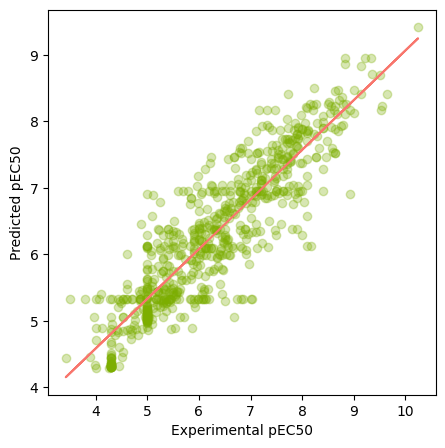

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pEC50')
plt.xlabel('Experimental pEC50')

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'


# Save Model as Pickle Object

In [15]:
import pickle

In [19]:
pickle.dump(model, open('tgr.pkl', 'wb'))